# **演習：散布図（Scatter Plots）**

**This notebook is an exercise in the [Data Visualization](https://www.kaggle.com/learn/data-visualization) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/scatter-plots).**

---


**このノートブックは、[Data Visualization](https://www.kaggle.com/learn/data-visualization)コースの練習問題です。 [このリンク](https://www.kaggle.com/alexisbcook/hello-seaborn)のチュートリアルを参照してください。**

---


In this exercise, you will use your new knowledge to propose a solution to a real-world scenario.  To succeed, you will need to import data into Python, answer questions using the data, and generate **scatter plots** to understand patterns in the data.

## Scenario

You work for a major candy producer, and your goal is to write a report that your company can use to guide the design of its next product.  Soon after starting your research, you stumble across this [very interesting dataset](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) containing results from a fun survey to crowdsource favorite candies.

## Setup

Run the next cell to import and configure the Python libraries that you need to complete the exercise.

この練習では、新しい知識を使用して、実際のシナリオに対するソリューションを提案します。成功するには、データをPythonにインポートし、データを使用して質問に回答し、**散布図**を生成してデータのパターンを理解する必要があります。

## シナリオ

あなたは大手菓子メーカーで働いています。あなたの目標は、会社が次の製品のデザインの指針として使用できるレポートを書くことです。調査を開始してすぐに、お気に入りのキャンディーをクラウドソーシングするための楽しい調査の結果を含む[非常に興味深いデータセット](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/)に出くわします。

## セットアップ

次のセルを実行して、演習を完了するために必要なPythonライブラリをインポートし、設定します。

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


The questions below will give you feedback on your work. Run the following cell to set up our feedback system.

以下の質問は、あなたの仕事に対するフィードバックを与えてくれます。次のセルを実行して、フィードバックシステムを設定します。

In [2]:
# Set up code checking
import os
if not os.path.exists("../input/candy.csv"):
    os.symlink("../input/data-for-datavis/candy.csv", "../input/candy.csv") 
from learntools.core import binder
binder.bind(globals())
from learntools.data_viz_to_coder.ex4 import *
print("Setup Complete")

Setup Complete


## Step 1: Load the Data

Read the candy data file into `candy_data`.  Use the `"id"` column to label the rows.

## ステップ1:データをロードする

candyデータファイルを`candy_data`に読み込みます。行にラベルを付けるには、`"id"`列を使用します。

In [3]:
# Path of the file to read
candy_filepath = "../input/candy.csv"

# Fill in the line below to read the file into a variable candy_data
candy_data = pd.read_csv(candy_filepath, index_col="id")

# Run the line below with no changes to check that you've loaded the data correctly
step_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [4]:
# Lines below will give you a hint or solution code
step_1.hint()
step_1.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Use `pd.read_csv`, and follow it with **two** pieces of text that are enclosed in parentheses and separated by commas.  (1) The filepath for the dataset is provided in `candy_filepath`.  (2) Use the `"id"` column to label the rows.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
candy_data = pd.read_csv(candy_filepath, index_col="id")
```

<span style="color:#3366cc">ヒント：</span>pd.read_csvを使用し、かっこで囲まれ、コンマで区切られた2つのテキストを続けます。(1) データセットのファイルパスは、candy_filepathで指定されます。(2) "id"列を使用して行にラベルを付けます。

<span style="color:#33cc33">解決策：</span>
```Python
candy_data = pd.read_csv(candy_filepath, index_col="id")
```


## Step 2: Review the data

Use a Python command to print the first five rows of the data.

## 手順2:データを確認する

Pythonコマンドを使用して、データの最初の5行を出力します。

In [5]:
# Print the first five rows of the data
# Your code here
candy_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547


The dataset contains 83 rows, where each corresponds to a different candy bar.  There are 13 columns:
- `'competitorname'` contains the name of the candy bar. 
- the next **9** columns (from `'chocolate'` to `'pluribus'`) describe the candy.  For instance, rows with chocolate candies have `"Yes"` in the `'chocolate'` column (and candies without chocolate have `"No"` in the same column).
- `'sugarpercent'` provides some indication of the amount of sugar, where higher values signify higher sugar content.
- `'pricepercent'` shows the price per unit, relative to the other candies in the dataset.
- `'winpercent'` is calculated from the survey results; higher values indicate that the candy was more popular with survey respondents.

Use the first five rows of the data to answer the questions below.

データセットには83行が含まれており、それぞれが異なるキャンディバーに対応しています。次の13列があります。
- `'competitorname'`にはキャンディバーの名前が含まれます。
- 次の**9**列 (`'chocolate'`から`'pluribus'`まで) はキャンディについて説明しています。例えば、チョコレートキャンディがある行は、「チョコレート」列に「はい」がある (チョコレートなしのキャンディは同じ列に「いいえ」がある) 。
- 「糖度 (sugarpercent) 」は砂糖の量を示す指標で、値が大きいほど糖度が高いことを示す。
- `'pricepercent'`は、データセット内の他のキャンディとの相対的な単価を示します。
- `'winpercent'`は調査結果から計算されます;値が高いほど、そのお菓子が調査回答者に人気があることを示しています。

データの最初の5行を使用して、次の質問に答えてください。

In [6]:
# 下の行を埋めてください:調査回答者に人気があったキャンディはどちらですか:
#  '3 Musketeers' と'Almond Joy'?(回答は単一引用符で囲んでください。)
more_popular = '3 Musketeers'

# 下の行を埋めてください:どちらのキャンディーがより高い砂糖含有量を持っていますか:
# 'Air Heads'と'Baby Ruth'?(回答は単一引用符で囲んでください。)
more_sugar = 'Air Heads'

# Check your answers
step_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [7]:
# Lines below will give you a hint or solution code
step_2.hint()
step_2.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Use the `head()` command to print the first 5 rows. **After printing the first 5 rows**, each row corresponds to a different candy. The `'winpercent'` column indicates the popularity of the candy. The `'sugarpercent'` column has the amount of sugar in the candy.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
# Print the first five rows of the data
candy_data.head()
# Which candy was more popular with survey respondents:
# '3 Musketeers' or 'Almond Joy'?
more_popular = '3 Musketeers'
# Which candy has higher sugar content: 'Air Heads'
# or 'Baby Ruth'?
more_sugar = 'Air Heads'

```

## Step 3: The role of sugar

Do people tend to prefer candies with higher sugar content?  

#### Part A

Create a scatter plot that shows the relationship between `'sugarpercent'` (on the horizontal x-axis) and `'winpercent'` (on the vertical y-axis).  _Don't add a regression line just yet -- you'll do that in the next step!_

## ステップ3:砂糖の役割

糖分の高いキャンディーを好む傾向がありますか?

#### パートA

「 sugarpercent(糖度) 」(横のx軸) と「winpercent(勝率)」(縦のy軸) の関係を示す散布図を作成します。_回帰直線はまだ追加しないでください。次の手順で追加します。_

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

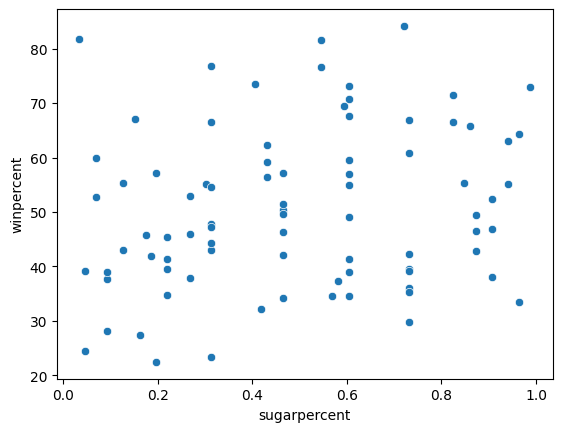

In [8]:
#  'sugarpercent'と'winpercent'の関係を示す散布図
sns.scatterplot(x=candy_data['sugarpercent'], y=candy_data['winpercent'])

# Check your answer
step_3.a.check()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Use `sns.scatterplot`, and set the variables for the x-axis and y-axis by using `x=` and `y=`, respectively.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
# Scatter plot showing the relationship between 'sugarpercent' and 'winpercent'
sns.scatterplot(x=candy_data['sugarpercent'], y=candy_data['winpercent'])

```

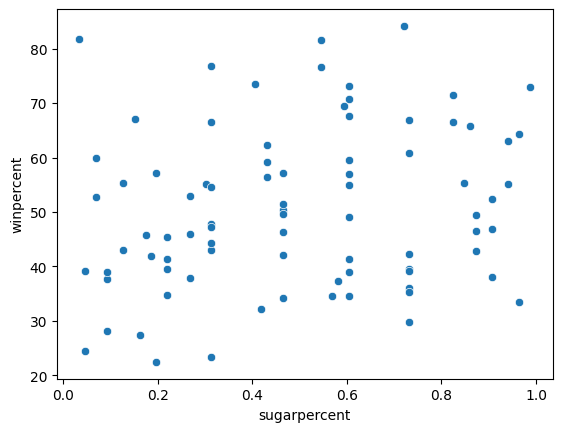

In [9]:
# Lines below will give you a hint or solution code
step_3.a.hint()
step_3.a.solution_plot()

#### Part B

Does the scatter plot show a **strong** correlation between the two variables?  If so, are candies with more sugar relatively more or less popular with the survey respondents?

#### パートB

散布図は、2つの変数の間に**強い**相関を示していますか?そうすると、砂糖の多いお菓子は、アンケート回答者に比較的人気がありますか、それとも人気がありませんか?

In [10]:
step_3.b.hint()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Compare candies with higher sugar content (on the right side of the chart) to candies with lower sugar content (on the left side of the chart). Is one group clearly more popular than the other?

<span style="color:#3366cc">ヒント：</span>糖度の高い飴 (表の右側) と低い飴 (表の左側) を比べてみてください。どちらかのグループの方が明らかに人気がありますか?

In [11]:
# Check your answer (Run this code cell to receive credit!)
step_3.b.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> The scatter plot does not show a strong correlation between the two variables. Since there is no clear relationship between the two variables, this tells us that sugar content does not play a strong role in candy popularity.

<span style="color:#33cc33">解決策：</span>
散布図は2つの変数の間に強い相関を示さない。2つの変数の間に明確な関係がないので、これは砂糖含有量がキャンディの人気に強い役割を果たしていないことを示している。

## Step 4: Take a closer look

#### Part A

Create the same scatter plot you created in **Step 3**, but now with a regression line!

## ステップ4:詳しく見る

#### パートA

**手順3**で作成したものと同じ散布図を作成しますが、ここでは回帰直線を使用します。

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

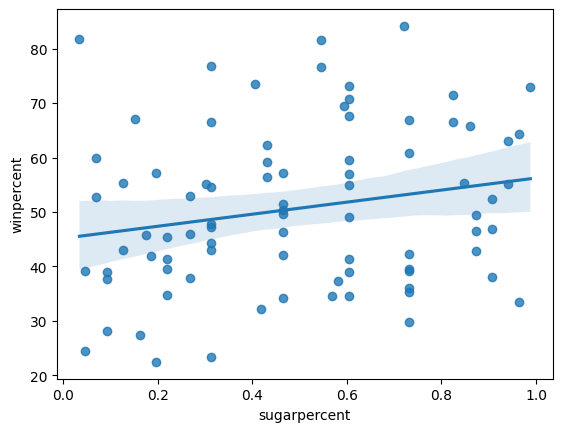

In [12]:
# Scatter plot w/ regression line showing the relationship between 'sugarpercent' and 'winpercent'
sns.regplot(x=candy_data['sugarpercent'], y=candy_data['winpercent'])

# Check your answer
step_4.a.check()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Use `sns.regplot`, and set the variables for the x-axis and y-axis by using `x=` and `y=`, respectively.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
# Scatter plot w/ regression line showing the relationship between 'sugarpercent' and 'winpercent'
sns.regplot(x=candy_data['sugarpercent'], y=candy_data['winpercent'])

```

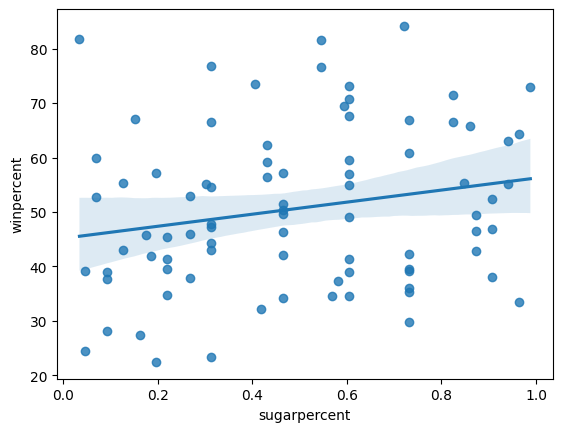

In [13]:
# Lines below will give you a hint or solution code
step_4.a.hint()
step_4.a.solution_plot()

#### Part B

According to the plot above, is there a **slight** correlation between `'winpercent'` and `'sugarpercent'`?  What does this tell you about the candy that people tend to prefer?

#### パートB

上のプロットによると、「winpercent」と「sugarpercent」の間には**わずか**の相関関係がありますか?これは、人々が好む傾向のあるキャンディについて何を物語っていますか?

In [14]:
step_4.b.hint()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Does the regression line have a positive or negative slope?

<span style="color:#3366cc">ヒント：</span>回帰直線の傾きは正か負か。

In [15]:
# Check your answer (Run this code cell to receive credit!)
step_4.b.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> Since the regression line has a slightly positive slope, this tells us that there is a slightly positive correlation between `'winpercent'` and `'sugarpercent'`. Thus, people have a slight preference for candies containing relatively more sugar.

<span style="color:#33cc33">解決策：</span>回帰線はわずかに正の傾きを持っているので、これは`'winpercent'`と`'sugarpercent'`の間にわずかに正の相関があることを示している。そのため、砂糖が比較的多いものを好む傾向がある。


## Step 5: Chocolate!

In the code cell below, create a scatter plot to show the relationship between `'pricepercent'` (on the horizontal x-axis) and `'winpercent'` (on the vertical y-axis). Use the `'chocolate'` column to color-code the points.  _Don't add any regression lines just yet -- you'll do that in the next step!_

## ステップ5:チョコレート!

下のコードセルで、`'pricepercent'` (横のx軸) と`'winpercent'`(縦のy軸) の関係を示す散布図を作成してください。ポイントを色分けするには`'chocolate'`列を使用します。_回帰直線はまだ追加しないでください。次の手順で追加します。_

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

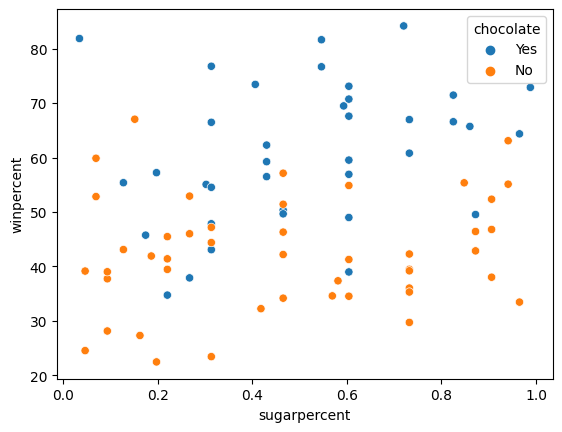

In [16]:
# Scatter plot showing the relationship between 'pricepercent', 'winpercent', and 'chocolate'
sns.scatterplot(x=candy_data['sugarpercent'], y=candy_data['winpercent'], hue=candy_data['chocolate'])

# Check your answer
step_5.check()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Use `sns.scatterplot`, and set the variables for the x-axis, y-axis, and color of the points by using `x=`, `y=`, and `hue=`, respectively.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
# Scatter plot showing the relationship between 'pricepercent', 'winpercent', and 'chocolate'
sns.scatterplot(x=candy_data['pricepercent'], y=candy_data['winpercent'], hue=candy_data['chocolate'])

```

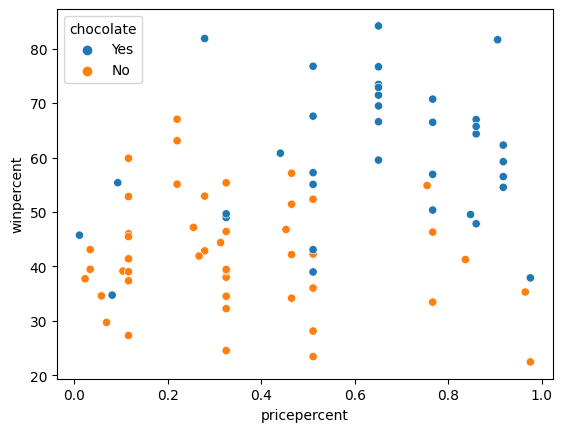

In [17]:
# Lines below will give you a hint or solution code
step_5.hint()
step_5.solution_plot()

Can you see any interesting patterns in the scatter plot?  We'll investigate this plot further  by adding regression lines in the next step!

## Step 6: Investigate chocolate

#### Part A

Create the same scatter plot you created in **Step 5**, but now with two regression lines, corresponding to (1) chocolate candies and (2) candies without chocolate.

散布図に何か面白いパターンが見えますか?次の手順で回帰直線を追加して、このプロットをさらに詳しく調べます。

## ステップ6:チョコレートを調べる

#### パートA

**手順5**で作成したものと同じ散布図を作成しますが、(1) チョコレートキャンディと (2) チョコレートなしのキャンディに対応する2本の回帰直線を使用します。

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

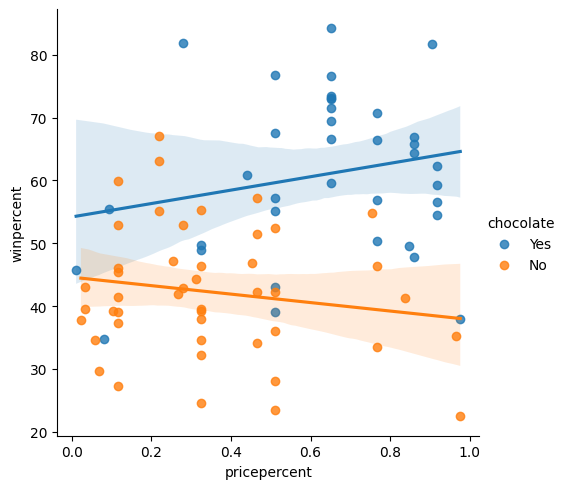

In [18]:
# Color-coded scatter plot w/ regression lines
sns.lmplot(x='pricepercent', y='winpercent', hue='chocolate', data=candy_data)

# Check your answer
step_6.a.check()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Use `sns.lmplot`, and set the variables for the x-axis, y-axis, color of the points, and the dataset by using `x=`, `y=`, `hue=`, and `data=`, respectively.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
# Color-coded scatter plot w/ regression lines
sns.lmplot(x="pricepercent", y="winpercent", hue="chocolate", data=candy_data)

```

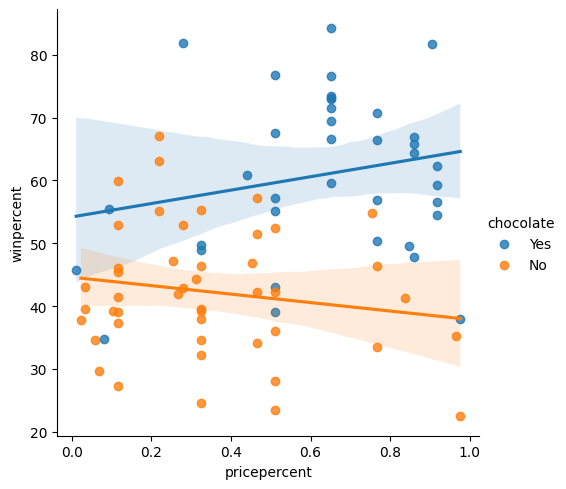

In [19]:
# Lines below will give you a hint or solution code
step_6.a.hint()
step_6.a.solution_plot()

#### Part B

Using the regression lines, what conclusions can you draw about the effects of chocolate and price on candy popularity?

#### パートB

回帰直線を使って、チョコレートと価格がキャンディーの人気に与える影響について、どのような結論を導き出すことができますか?

In [20]:
step_6.b.hint()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Look at each regression line - do you notice a positive or negative slope?

In [21]:
# Check your answer (Run this code cell to receive credit!)
step_6.b.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> We'll begin with the regression line for chocolate candies. Since this line has a slightly positive slope, we can say that more expensive chocolate candies tend to be more popular (than relatively cheaper chocolate candies).  Likewise, since the regression line for candies without chocolate has a negative slope, we can say that if candies don't contain chocolate, they tend to be more popular when they are cheaper.  One important note, however, is that the dataset is quite small -- so we shouldn't invest too much trust in these patterns!  To inspire more confidence in the results, we should add more candies to the dataset.

<span style="color:#33cc33">解決策：</span>チョコレート菓子の回帰直線から始めましょう。この直線はわずかに正の傾きを持っているので、(比較的安価なチョコレートキャンディよりも) 高価なチョコレートキャンディの方が人気が高い傾向があると言える。同様に、チョコレートが入っていないキャンディの回帰直線は負の傾きを持っているので、チョコレートが入っていないキャンディは、より安いときに人気がある傾向があると言えます。ただし、データセットが非常に小さいため、これらのパターンを信頼しすぎないようにすることが重要です。結果の信頼性を高めるには、データセットにキャンディを追加する必要があります。


## Step 7: Everybody loves chocolate.

#### Part A

Create a categorical scatter plot to highlight the relationship between `'chocolate'` and `'winpercent'`.  Put `'chocolate'` on the (horizontal) x-axis, and `'winpercent'` on the (vertical) y-axis.

## ステップ7:誰もがチョコレートを愛しています。

#### パートA

`'chocolate'`と`'winpercent'`の関係を強調するために、カテゴリ別散布図を作成してください。横のx軸に「chocolate」、縦のy軸に「winpercent」とする。

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

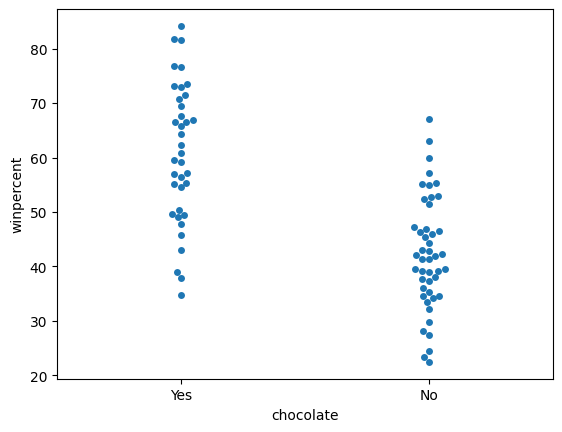

In [22]:
# Scatter plot showing the relationship between 'chocolate' and 'winpercent'
sns.swarmplot(x=candy_data['chocolate'], y=candy_data['winpercent'])

# Check your answer
step_7.a.check()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Use `sns.swarmplot`, and set the variables for the x-axis and y-axis by using `x=` and `y=`, respectively.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
# Scatter plot showing the relationship between 'chocolate' and 'winpercent'
sns.swarmplot(x=candy_data['chocolate'], y=candy_data['winpercent'])

```

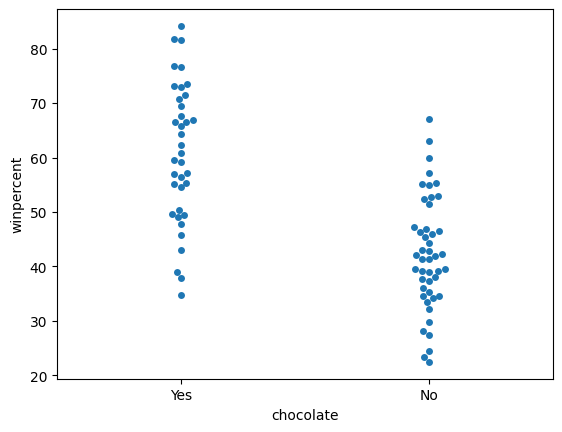

In [23]:
# Lines below will give you a hint or solution code
step_7.a.hint()
step_7.a.solution_plot()

#### Part B

You decide to dedicate a section of your report to the fact that chocolate candies tend to be more popular than candies without chocolate.  Which plot is more appropriate to tell this story: the plot from **Step 6**, or the plot from **Step 7**?

#### パートB

レポートの1セクションを、チョコレートを使用しないキャンディよりもチョコレートキャンディの方が人気が高いという事実に割り当てることにします。**ステップ6**からのプロットと**ステップ7**からのプロットのどちらがこのストーリーを伝えるのに適していますか?

In [24]:
step_7.b.hint()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Which plot communicates more information?  In general, it's good practice to use the simplest plot that tells the entire story of interest.

<span style="color:#3366cc">ヒント：</span>どちらのプロットがより多くの情報を伝えますか?  
一般に、関心のあるストーリー全体を示す最も単純なプロットを使用することをお勧めします。


In [25]:
# Check your answer (Run this code cell to receive credit!)
step_7.b.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> In this case, the categorical scatter plot from **Step 7** is the more appropriate plot. While both plots tell the desired story, the plot from **Step 6** conveys far more information that could distract from the main point.

<span style="color:#33cc33">解決策：</span>この場合、手順7のカテゴリ別散布図の方が適切です。どちらのプロットも目的のストーリーを伝えていますが、ステップ6のプロットの方がはるかに多くの情報を伝えているため、要点からそれる可能性があります。


## Keep going

Explore **[histograms and density plots](https://www.kaggle.com/alexisbcook/distributions)**.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/data-visualization/discussion) to chat with other learners.*

---




*質問やコメントがありますか？[コースディスカッションフォーラム](https://www.kaggle.com/learn/data-visualization/discussion)で他の学習者とチャットしてください。*